# ==========================特徵工程==========================
## 用來尋找最佳的機器學習方法及參數，本次測試兩種機器學習方法
## 1.邏輯斯回歸(LogisticRegession)
## 2.支援向量機(SupportVectorMachine)
***

## 匯入相關套件

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import time

## 匯入資料集

In [3]:
dataset_dir = '../model/'

df = pd.read_csv(dataset_dir + 'train.csv')
jobs = -1
cross_validation = 10

FEATURES = ['R', 'G', 'B', 'His_AVG', 'His_STD']
X_train, X_test, y_train, y_test = train_test_split(
    df[FEATURES],                   
    df['Label'],                   
    test_size=0.2,                
    random_state=0,                
)
df

,Image,R,G,B,His_AVG,His_STD,Label
0,44097111130.png,184,161,133,112,89,101
1,44097111130.png,187,165,137,136,84,101
2,44097111130.png,198,176,148,120,66,101
3,44097111130.png,194,172,143,131,73,101
4,44097111130.png,192,168,141,150,81,101
...,...,...,...,...,...,...,...
3235,716269118135.png,190,175,155,95,68,52
3236,716269118135.png,183,168,148,86,53,52
3237,716269118135.png,187,173,153,88,55,52
3238,716269118135.png,185,170,151,87,66,52


## 建立創建機器學習種類函式

In [3]:
def pipe_calssification():
    LR_pipe = Pipeline([
        ('LogisticRegession', LogisticRegression()),],
        verbose = True)
    SVC_pipe = Pipeline([
        ('SVC', SVC()),],
        verbose = True)
    return LR_pipe, SVC_pipe

## 建立設定管線化參數函式

In [4]:
def pipe_parm():
    params = {
        'LogisticRegession':{
            'LogisticRegession__penalty': ['l1', 'l2'],
            'LogisticRegession__solver': ['liblinear','saga'],
            'LogisticRegession__random_state': [0, 1]},
        'SVC':{
            'SVC__C': [0.1, 1, 3],
            'SVC__kernel': ['linear', 'poly', 'rbf'],            
            'SVC__degree': [2, 3, 4]}
    }
    return params

## 建立分析特徵重要性函式

In [5]:
def plt_keys(pipe, method, X, y):
    print('Best accuracy: %.3f' % pipe.best_score_)
    print('\nBest params:\n',pipe.best_params_)
    
    result = permutation_importance(pipe, X, y, n_repeats=10,
                                    random_state=42, n_jobs=2)
    sorted_idx = result.importances_mean.argsort()  

    fig, ax = plt.subplots()
    ax.barh(FEATURES , result.importances[sorted_idx].mean(axis=1).T)
    ax.set_title(f"Permutation Importances of {method}")
    fig.tight_layout()
    plt.show()

## 建立驗證模型準確率函式，並繪製出混淆矩陣

In [6]:
def verify_data(pipe):
    new_df = pd.read_csv(dataset_dir +'verify.csv')
    X_test = new_df[FEATURES]
    y_test = new_df[['Label']]
    
    y_pred_test = pipe.predict(X_test)


    labels = ['11', '12', '51', '52', '101', '102', '103', '501', '502'] # 定義表格標籤
    cm = confusion_matrix(y_test, y_pred_test)
    cmd = ConfusionMatrixDisplay(cm, display_labels = labels)            # 將標籤填入表格
    cmd.plot()
    cmd.ax_.set(xlabel='Predicted', ylabel='True')                                      
    print(f'confusion matrix {cm}')    

## 取得管線化所用的參數

In [7]:
LR_pipe, SVC_pipe = pipe_calssification()
params = pipe_parm()

## 邏輯斯回歸

D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   1.7s


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   2.4s


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   1.9s


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   1.8s


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   2.1s


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   1.6s


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   2.2s


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   1.8s


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   2.0s


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   1.6s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s


D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s


D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s


D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   2.0s


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   2.2s


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   1.8s


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   2.0s


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   1.6s


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   1.8s


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   2.1s


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   1.8s


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   1.8s


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   1.8s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s


D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s


D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s


D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.0s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.0s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.0s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.0s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.0s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.0s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.0s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.0s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.0s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.0s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s


D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s


D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s


D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.0s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.0s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.0s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.0s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.0s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.0s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.0s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.0s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.0s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.0s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s


D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s


D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s
[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   0.1s


D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Pipeline] . (step 1 of 1) Processing LogisticRegession, total=   1.9s
Best accuracy: 0.575

Best params:
 {'LogisticRegession__penalty': 'l1', 'LogisticRegession__random_state': 0, 'LogisticRegession__solver': 'liblinear'}


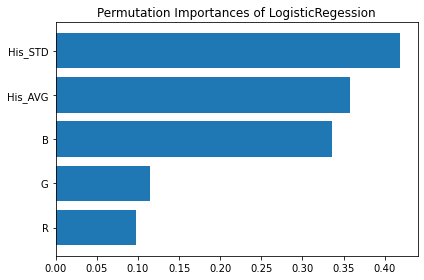

confusion matrix [[30  8  0  2  2  2  0 10  0]
 [14 40  0  0  0  0  0  0  0]
 [ 0  0  2 14 14 14 10  0  0]
 [ 0  0  0 24  0 30  0  0  0]
 [ 8  0  2 14  2  8 20  0  0]
 [ 0  0 18  4  6 24  2  0  0]
 [ 2  0 19 16  9  2  6  0  0]
 [ 0  0  0  0  0  0  0 48  6]
 [ 0  0  0  0  0  0  0  8 46]]
total time： 43.955252170562744


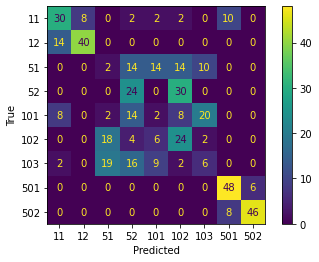

In [8]:
start = time.time()

method = 'LogisticRegession'
gs_pipe = GridSearchCV(estimator = LR_pipe, 
                        param_grid = params[method],
                        scoring = 'accuracy',
                        cv = cross_validation)
gs_pipe.fit(X_train, y_train)
plt_keys(gs_pipe, method, X_test, y_test)
verify_data(gs_pipe)

end = time.time()
print('total time：',end -start)

## 支援向量機

[Pipeline] ............... (step 1 of 1) Processing SVC, total=   0.5s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=   0.6s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=   0.5s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=   0.6s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=   0.6s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=   0.6s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=   0.5s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=   0.6s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=   0.5s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=   0.6s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=   0.1s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=   0.1s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=   0.1s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=   0.1s
[Pipel

[Pipeline] ............... (step 1 of 1) Processing SVC, total=   0.1s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=   0.1s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=   0.1s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=   3.7s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=   4.6s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=   3.6s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=   3.8s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=   3.8s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=   4.3s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=   4.5s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=   5.3s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=   3.6s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=   4.4s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=   0.2s
[Pipel

[Pipeline] ............... (step 1 of 1) Processing SVC, total=   0.1s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=   0.1s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=   0.1s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=   0.1s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=   0.1s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=  10.6s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=  12.7s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=  10.1s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=  12.1s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=  11.9s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=  13.8s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=  11.7s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=  14.2s
[Pipeline] ............... (step 1 of 1) Processing SVC, total=  10.4s
[Pipel

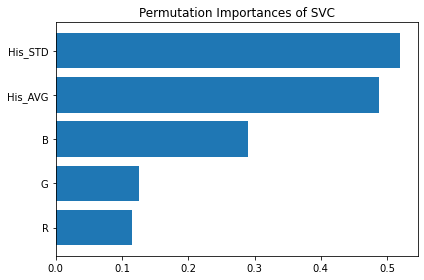

confusion matrix [[34 12  8  0  0  0  0  0  0]
 [36 18  0  0  0  0  0  0  0]
 [ 0  0 14  0 18  6 16  0  0]
 [ 0  0  4 24  6 20  0  0  0]
 [ 0  0 10  2 32  4  6  0  0]
 [ 0  0  2  6 16 18 12  0  0]
 [ 2  0  0  6 28  0 18  0  0]
 [ 0  0  0  0  0  0  0 52  2]
 [ 0  0  0  0  0  0  0 10 44]]
total time： 583.3133363723755


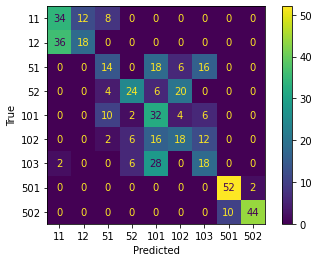

In [9]:
start = time.time()

method = 'SVC'
gs_pipe = GridSearchCV(estimator = SVC_pipe, 
                        param_grid = params[method],
                        scoring = 'accuracy',
                        cv = cross_validation)
gs_pipe.fit(X_train, y_train)
plt_keys(gs_pipe, method, X_test, y_test)
verify_data(gs_pipe)

end = time.time()
print('total time：',end -start)

## 根據網格搜尋，邏輯斯回歸準確率為0.575，支援向量機準確率為0.735
## 因此後續將使支援向量機作為機器學習的方法
***

## 由於先前將硬幣分為正反兩面，所以可針對此混淆矩陣進行合併
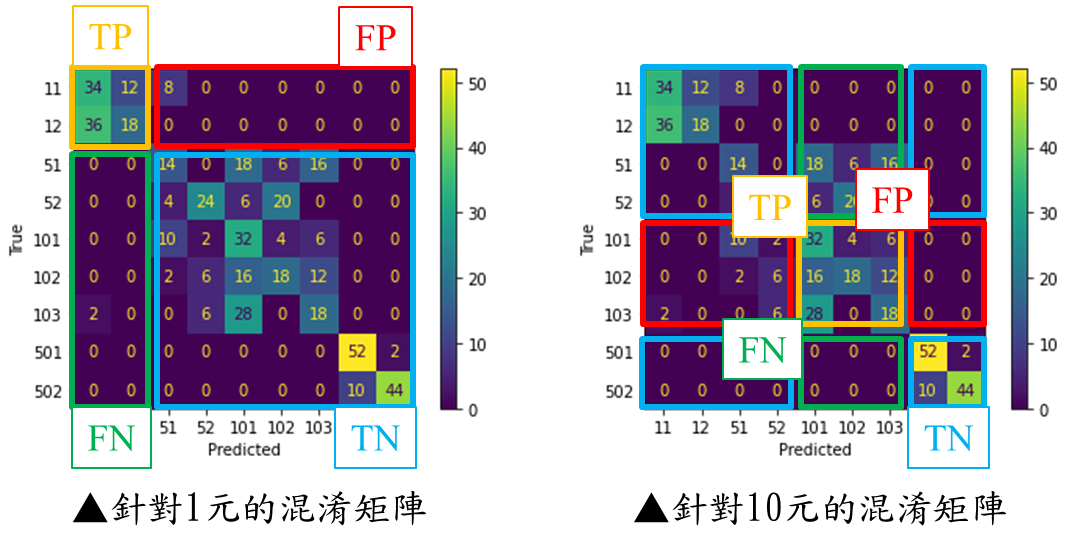
## 根據上述方式重新繪製混淆矩陣，結果如下：
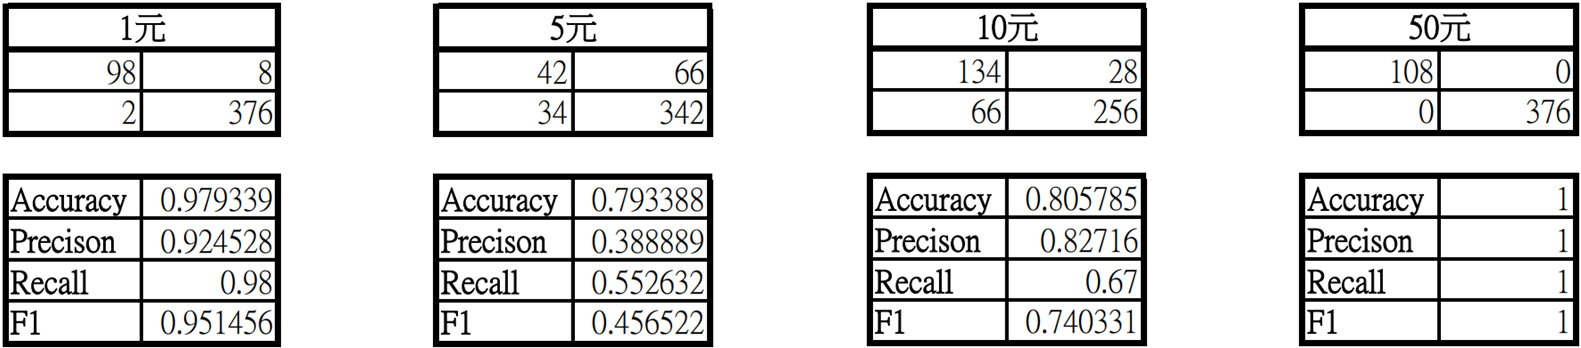